<a href="https://colab.research.google.com/github/gopijntu/hello-world/blob/master/stock%201%20week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('all_stocks_5yr.csv')
cl = data[data['Name']=='MNST'].close

Saving all_stocks_5yr.csv to all_stocks_5yr.csv


In [0]:
cv = cl.values
scl = MinMaxScaler()
#Scale the data
#cl = cl.reshape(cl.shape[0],1)
cv = cv.reshape(cv.shape[0],1)
cv = scl.fit_transform(cv)
cv

array([[0.00404759],
       [0.00784852],
       [0.00355052],
       ...,
       [0.90544407],
       [0.91217137],
       [0.91852493]])

In [0]:
#Create a function to process the data into 7 day look back slices
#codes is edited here to include the argument gap, i.e. we leave a gap from 7 days window presented to the lstm
#for the target value used for training and prediction
def processData(data,lb,gap):
    X,Y = [],[]
    for i in range(len(data)-lb-gap-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb+gap),0])
    return np.array(X),np.array(Y)
X,y = processData(cv,7,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

995
249
995
249


In [0]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

W0906 13:22:44.040743 139642964227968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 13:22:44.095326 139642964227968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 13:22:44.105719 139642964227968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 13:22:44.505749 139642964227968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 13:22:44.750237 139642964227968 deprecation.py:323

Train on 995 samples, validate on 249 samples
Epoch 1/300
995/995 [==============================] - 6s 6ms/step - loss: 0.0033 - val_loss: 0.0230
Epoch 2/300
995/995 [==============================] - 1s 687us/step - loss: 0.0121 - val_loss: 0.0048
Epoch 3/300
995/995 [==============================] - 1s 699us/step - loss: 0.0095 - val_loss: 0.0119
Epoch 4/300
995/995 [==============================] - 1s 680us/step - loss: 0.0029 - val_loss: 0.0066
Epoch 5/300
995/995 [==============================] - 1s 689us/step - loss: 0.0022 - val_loss: 0.0045
Epoch 6/300
995/995 [==============================] - 1s 679us/step - loss: 0.0019 - val_loss: 0.0034
Epoch 7/300
995/995 [==============================] - 1s 670us/step - loss: 0.0018 - val_loss: 0.0032
Epoch 8/300
995/995 [==============================] - 1s 675us/step - loss: 0.0018 - val_loss: 0.0032
Epoch 9/300
995/995 [==============================] - 1s 693us/step - loss: 0.0019 - val_loss: 0.0033
Epoch 10/300
995/995 [=======

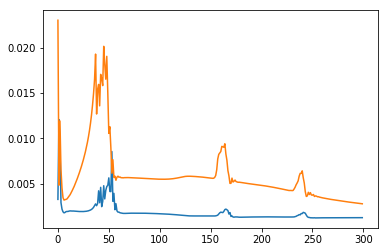

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
X_test[0]

array([[0.52553851],
       [0.52908903],
       [0.5182506 ],
       [0.50965461],
       [0.50274044],
       [0.50516974],
       [0.50834652]])

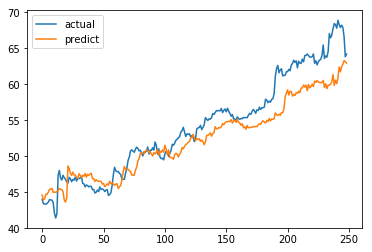

In [0]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='actual')
plt.plot(scl.inverse_transform(Xt), label='predict')
plt.legend()
plt.show()

In [0]:
act = []
pred = []
#for i in range(250):
i=X_test.shape[0]-1
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[62.959366]], actual:[[64.21]]


In [0]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

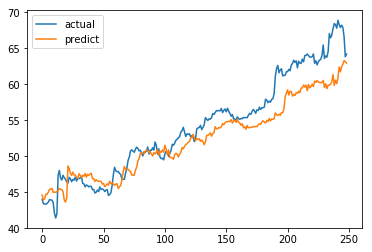

In [0]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='actual')
plt.plot(scl.inverse_transform(Xt), label='predict')
plt.legend()
plt.show()

In [0]:
X_test[X_test.shape[0]-1]

array([[0.96561602],
       [0.95440386],
       [0.96169177],
       [0.97869688],
       [0.99140401],
       [0.98822723],
       [0.97925749]])

In [0]:
X_test[X_test.shape[0]-2]

array([[0.9187118 ],
       [0.96561602],
       [0.95440386],
       [0.96169177],
       [0.97869688],
       [0.99140401],
       [0.98822723]])